<a href="https://colab.research.google.com/github/rgrAndrade/Desafio/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
 

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste projeto é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre as compras que as pessoas fazem em algum momento acessando o Blog.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset para treinamento de machine learning .</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Iremos seguir os passos a seguindo cada etapa nas células</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>receita</b> - Receita das Compras</li>
    <li><b>usuarios_blog</b> - Número de pessoas que acessam o Blog</li>
    <li><b>usuarios_site</b> - Número de pessoas que acessam o Site</li>
    <li><b>transacoes_blog</b> - Número de pessoas que passam pelo Blog que não compram</li>
    <li><b>transacoes_site</b> - Número de pessoas que passam pelo Site que não compram</li>
</ul>

## Leitura dos dados

In [26]:
import pandas as pd
uri = "https://raw.githubusercontent.com/rgrAndrade/Desafio/main/dados/psel%20-%20data.csv"
dados = pd.read_csv(uri)
dados.head( )

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


## Verificando o tamanho do dataset

In [25]:
dados.shape


(639, 6)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [27]:
dados.describe().round(2)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,639.00,639.00,639.00,639.00,639.00
mean,1623891.19,528.35,19039.14,1439.85,101610.49
std,1160581.16,1201.78,13677.73,3369.87,37240.23
min,32085.00,0.00,3557.00,0.00,26298.00
25%,807342.00,0.00,11013.00,0.00,77727.00
50%,1263161.00,0.00,16069.00,0.00,96104.00
75%,2232769.50,0.00,22606.50,0.00,117586.50
max,12266844.00,5586.00,188955.00,13059.00,369989.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [28]:
dados.corr().round(4)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
receita,1.0000,0.5317,0.8126,0.5180,0.7112
transacoes_blog,0.5317,1.0000,0.0689,0.8933,0.1623
transacoes_site,0.8126,0.0689,1.0000,0.0543,0.8200
usuarios_blog,0.5180,0.8933,0.0543,1.0000,0.1518
usuarios_site,0.7112,0.1623,0.8200,0.1518,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Importando biblioteca seaborn

In [29]:
import seaborn as sns

## Configure o estilo e cor dos gráficos

In [30]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

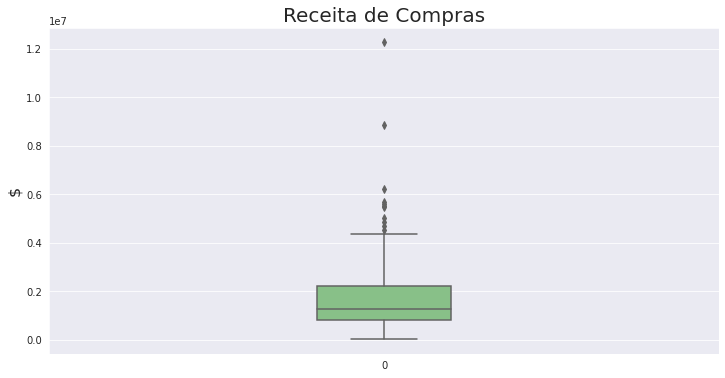

In [31]:
ax = sns.boxplot(data=dados['receita'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Receita de Compras', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Gráfico do box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>